In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\Owner`


In [2]:
Pkg.add("Flux")
Pkg.add("MLDatasets")
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
Pkg.add("Images")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("StatsBase")
Pkg.add("GLM")
Pkg.add("Optim")

   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifes

In [3]:
Pkg.add("JuMP")
Pkg.add("SCS")

   Resolving package versions...
   Installed JuMP ─ v1.23.3
    Updating `C:\Users\Owner\Project.toml`
⌃ [4076af6c] + JuMP v1.23.3
    Updating `C:\Users\Owner\Manifest.toml`
⌃ [4076af6c] + JuMP v1.23.3
        Info Packages marked with ⌃ have new versions available and may be upgradable.
Precompiling project...
  ✓ JuMP
  1 dependency successfully precompiled in 18 seconds. 552 already precompiled.
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [4]:
Pkg.add("Convex")

   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [5]:
using MLDatasets
using Flux
using Plots
using Statistics
using LinearAlgebra
using Optim
using GLM
using DataFrames
using CSV


In [6]:
using Convex

In [7]:
using JuMP
using SCS

In [8]:
# Load the MNIST dataset
train_data = MNIST(split=:train)
test_data = MNIST(split=:test)

# Select first 1000 samples from train and test set
n_samples = 1000

train_images = train_data.features[:, :, 1:n_samples]
train_labels = train_data.targets[1:n_samples]

test_images = test_data.features[:, :, 1:n_samples]
test_labels = test_data.targets[1:n_samples]

# Check dimensions of the first image (should be 28x28)
println("Size of the first training image: ", size(train_images[:, :, 1]))  # Expect (28, 28)

Size of the first training image: (28, 28)


In [9]:
#put data into matrix
function vectorize_images(images)
    return [reshape(img, 28*28) for img in eachslice(images, dims=3)]
end

function one_hot_encode(labels)
    one_hot_labels = zeros(Int, 10, length(labels))
    for (i, label) in enumerate(labels)
        one_hot_labels[label+1, i] = 1 
    end
    return one_hot_labels
end

X_train = vectorize_images(train_images)
y_train = one_hot_encode(train_labels)
X_test = vectorize_images(test_images)
y_test = one_hot_encode(test_labels)

#training batch
A = hcat(X_train...)'  
B = y_train'  
#testing batch for accuracy
C = hcat(X_test...)'  
D = y_test' 

1000×10 adjoint(::Matrix{Int64}) with eltype Int64:
 0  0  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  1
 ⋮              ⋮           
 0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  1

In [10]:
# make sure A is (1000, 784) and B is (1000, 10)
println("Dimensions of A: ", size(A))  # Should be (1000, 784)
println("Dimensions of B: ", size(B))  # Should be (1000, 10)
println("Dimensions of C: ", size(C))  # Should be (1000, 784)
println("Dimensions of D: ", size(D))  # Should be (1000, 10)

Dimensions of A: (1000, 784)
Dimensions of B: (1000, 10)
Dimensions of C: (1000, 784)
Dimensions of D: (1000, 10)


In [11]:
println("A' * A dimension: ", size(A' * A))  # should be (784, 784)
println("A' * B dimension: ", size(A' * B))  # should be (784, 10)

A' * A dimension: (784, 784)
A' * B dimension: (784, 10)


In [12]:
# solve the Lasso problem
function lasso(A, B, λ)
    (T, K) = (size(A, 1), size(A, 2))  # A's dimensions are (1000, 784)
    Q = A'A / T        # Q will be of size (784, 784)

    # Initialize matrix to store solutions for each target
    X = zeros(K, size(B, 2))  # (784, 10)

    for i in 1:size(B, 2)  # Solve for each column in B
        c = A'B[:, i] / T        # c will be of size (784,)
        
        # Define the variable to optimize over (784,)
        x = Variable(K)

        # Define the objective function components
        L1 = quadform(x, Q; assume_psd=true)      # x'Qx (quadratic term)
        L2 = dot(c, x)           # c'x (linear term)
        L3 = norm(x, 1)          # L1 regularization ||x||_1

        # Solve the problem
        problem = minimize(L1 - 2 * L2 + λ * L3)
        solve!(problem, SCS.Optimizer; silent=true)

        # Store the solution for the i-th column
        X[:, i] = vec(evaluate(x))
    end

    return X
end

lasso (generic function with 1 method)

In [14]:
# solve Lasso
λ = 0.1  # L1 
X = lasso(A, B, λ)

784×10 Matrix{Float64}:
 3.59458e-17  -6.95291e-17  -4.13557e-17  …  -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17  …  -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17  …  -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 3.59458e-17  -6.95291e-17  -4.13557e-17     -2.51103e-17  -6.89505e-17
 ⋮                                      

In [15]:
function get_important_pixels(X, top_n=100)
    importance = mapslices(x -> sum(abs.(x)), X, dims=2)  # Ensure summation along rows
    important_pixels = sortperm(vec(importance), rev=true)  # Sort and get top indices
    return important_pixels[1:top_n]  # Return top_n important pixel indices
end

important_pixels = get_important_pixels(X)

println("important_pixels：", important_pixels)

important_pixels：[429, 490, 270, 351, 379, 324, 512, 545, 410, 544, 352, 407, 573, 382, 437, 435, 628, 492, 212, 348, 269, 461, 376, 406, 465, 240, 403, 263, 300, 599, 598, 182, 484, 214, 627, 572, 486, 375, 377, 458, 657, 349, 409, 271, 488, 213, 184, 185, 603, 186, 602, 183, 604, 576, 600, 601, 629, 577, 187, 157, 630, 211, 550, 158, 626, 156, 549, 210, 597, 575, 605, 631, 523, 578, 495, 522, 188, 215, 551, 159, 216, 155, 467, 468, 238, 496, 632, 625, 440, 570, 237, 439, 209, 574, 244, 548, 494, 571, 596, 380]


In [16]:
function visualize_important_pixels(important_pixels)
    img = zeros(28, 28)
    for i in important_pixels
        row = div(i-1, 28) + 1
        col = mod(i-1, 28) + 1
        img[row, col] = 1
    end
    heatmap(img, title="important_pixels")
end

visualize_important_pixels (generic function with 1 method)

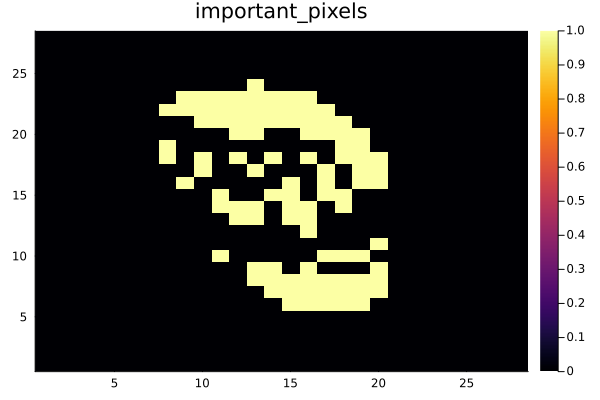

In [17]:
visualize_important_pixels(important_pixels)

In [18]:
print(size(important_pixels))

(100,)

In [19]:
function evaluate_accuracy(A_test, important_pixels, X, A_test_labels)
    X_test = A_test[:, important_pixels] # Select only important pixels
    X = X[important_pixels, :]  # Extract only the weights for the important pixels
    predictions = argmax(X_test * X, dims=2) # Predict using important pixel weights
    A_test_labels = argmax(A_test_labels, dims=2)  # Convert 
    
    means= mean(predictions .== A_test_labels) 
      
    return means
end

evaluate_accuracy (generic function with 1 method)

In [20]:
#check accuracy using testing batch
accuracy = evaluate_accuracy(C, important_pixels, X, D)
println("Accuracy using most important pixels: ", accuracy)

Accuracy using most important pixels: 0.362


In [21]:
function analyze_digit(A, B, digit, λ)
    target_B = (B .== digit)  # set up B as 1, others as 0
    
    # use Lasso to find the most important pixels
    X_digit = lasso(A, target_B, λ)
    
    return X_digit
end

analyze_digit (generic function with 1 method)

In [23]:
for digit in 0:9
    X_digit = analyze_digit(A, B, digit, λ)
 
    important_pixels_digit = get_important_pixels(X_digit)
    
    println("figure", digit, "key pixels", important_pixels_digit)
end

figure0key pixels[410, 463, 435, 379, 270, 434, 407, 575, 238, 408, 242, 631, 241, 184, 438, 213, 467, 269, 437, 491, 628, 571, 547, 576, 211, 301, 600, 380, 324, 300, 598, 375, 429, 348, 214, 492, 604, 182, 572, 273, 411, 605, 602, 291, 465, 382, 271, 462, 493, 210, 374, 574, 546, 347, 457, 466, 627, 573, 294, 549, 599, 266, 494, 239, 323, 298, 402, 292, 299, 183, 519, 490, 352, 264, 268, 630, 346, 272, 603, 409, 156, 381, 328, 243, 601, 321, 439, 629, 578, 319, 430, 350, 236, 322, 551, 187, 297, 244, 432, 545]
figure1key pixels[429, 490, 270, 351, 379, 324, 512, 545, 410, 544, 352, 407, 573, 382, 437, 435, 628, 492, 212, 348, 269, 461, 376, 406, 465, 240, 403, 263, 300, 599, 598, 182, 484, 214, 627, 572, 486, 375, 377, 458, 657, 349, 409, 271, 488, 213, 184, 185, 603, 186, 602, 183, 604, 576, 600, 601, 629, 577, 187, 157, 630, 211, 550, 158, 626, 156, 549, 210, 597, 575, 605, 631, 523, 578, 495, 522, 188, 215, 551, 159, 216, 155, 467, 468, 238, 496, 632, 625, 440, 570, 237, 439, 209,